## IMPORTING REQUIRED MODULES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## CREATING DATAFRAME

In [2]:
np.random.seed(1)
x=[]
for i in range(1000):
    x.append(np.random.rand()) 
y=[]
w = 1
b = 1
for i in range(1000):
    y.append(x[i]*w+b +(np.random.randn()*0.09))

In [3]:
data = {"x": x, 
        "y": y}
data = pd.DataFrame(data)
data.head()

,x,y
0,0.417022,1.482322
1,0.720324,1.691146
2,0.000114,1.073405
3,0.302333,1.372575
4,0.146756,1.014991


## RELATION BETWEEN INDEPENDENT VARIABLES

In [4]:
data.corr()

,x,y
x,1.000000,0.953107
y,0.953107,1.000000


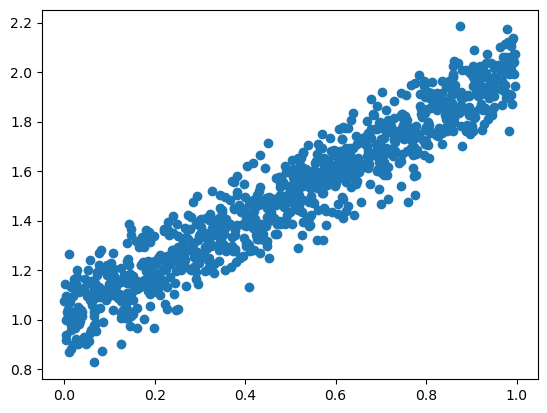

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data["x"], data["y"])

## GRADIENT DESCENT

In [31]:
m = 0
c = 0
l = 0.000001
e = 0
error = [] 

for j in range(1000):
    dm = 0
    dc = 0
    data["y_pred"] = (m * data["x"]) + c
    
    dm = 2 * sum(data["x"] * (data["y"] - data["y_pred"])) * l
    dc = 2 * sum((data["y"] - data["y_pred"])) * l
    
    m = m - (dm)
    c = c - (dc)

In [32]:
m

-7.482329724045915

In [33]:
c

-13.845467019264888

In [9]:
x = np.array(data["x"]).reshape((-1, 1))
y = np.array(data["y"]).reshape((-1, 1))
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x,y) 

LinearRegression()

In [11]:
print("intercept : ", model.intercept_)
print("slope: ", model.coef_)

intercept :  [1.0037798]
slope:  [[1.00095704]]


# SKLEARN

In [20]:
x_mean = data["x"].mean()
y_mean = data["y"].mean()
print("mean of x = ", x_mean)
print("mean of y = ", y_mean)

mean of x =  0.500604599455905
mean of y =  1.504863498755579


In [21]:
size = data.shape[0]
numerator = 0
denominator = 0
for i in range(size):
    numerator += ( (data["x"][i] * data["y"][i]) - (y_mean * data["x"][i]) )
    denominator += ( (data["x"][i] * data["x"][i]) - (x_mean * data["x"][i]) )
m = numerator/denominator
print("slope, m = ", m)

slope, m =  1.0009570354768205


In [22]:
c = y_mean - (m * x_mean)    
print("intercept, c = ", c)

intercept, c =  1.0037798029381353


In [23]:
y_pred = []
for i in range(size):
    y_pred.append( (m * data["x"][i]) + c )
data["y_pred"] = y_pred
data["y_pred"]

0      1.421201
1      1.724794
2      1.003894
3      1.306402
4      1.150676
         ...   
995    1.979116
996    1.315781
997    1.673216
998    1.330059
999    1.778998
Name: y_pred, Length: 1000, dtype: float64

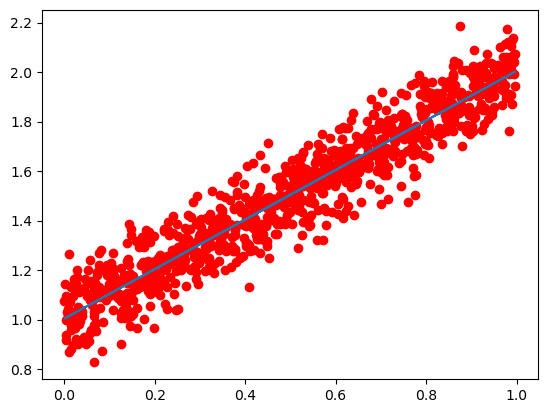

In [24]:
plt.plot(data["x"], data["y_pred"])
plt.scatter(data["x"], data["y"], c = "r")

In [25]:
mse = 0
for i in range(size):
    mse += (data["y"][i] - data["y_pred"][i]) ** 2
mse = mse/size
print("Mean squared error = ", mse)

Mean squared error =  0.008399348466779383


In [26]:
rmse = mse ** 0.5
print("Root mean square error = ", rmse)

Root mean square error =  0.09164795942507058


In [27]:
mae = 0
for i in range(size):
    mae += abs((data["y"][i] - data["y_pred"][i]))
mae = mae/size
print("Mean absolute error = ", mae)

Mean absolute error =  0.07262068679548393
